In [ ]:
import pandas as pd
import numpy as np

# read emoticon dataset
train_emoticon_df = pd.read_csv("/content/drive/MyDrive/datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

test_emoticon_X = pd.read_csv("/content/drive/MyDrive/datasets/test/test_emoticon.csv")['input_emoticon'].tolist()


print(f"Train dataset size: ")
print(f"train_emoticon_X: {len(train_emoticon_X)} train_emoticon_Y: {len(train_emoticon_Y)}")



print()
print("Test dataset size: ")
print(f"test_emoticon_X: {len(test_emoticon_X)}")

Train dataset size: 
train_emoticon_X: 7080 train_emoticon_Y: 7080

Test dataset size: 
test_emoticon_X: 2232


In [ ]:
train_emoticon_df.head(5)

,input_emoticon,label
0,😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣,0
1,🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼,0
2,😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼,0
3,😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯,1
4,🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼,1


In [ ]:
# read emoticon dataset
valid_emoticon_df = pd.read_csv("/content/drive/MyDrive/datasets/valid/valid_emoticon.csv")
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()
valid_emoticon_df.head(5)

,input_emoticon,label
0,🚼😛😔😑😣🚚🙯🛐🙼😑😣🙯🚍,1
1,🛐😣🙗😛🙸🙯😑🚼😑🙯😣🙼😉,1
2,🚼🛐🚩😛🙯🚄😣😑😸🙯😑🙼😣,0
3,😛😡😑🙻😣🙯🚼🛐😣😒🙯🙼😑,0
4,🙨😑😳😛😣🛐🚼🙯😚😣🙼😑🙯,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Split each string into individual emoticons
train_emoticon_X_split = [list(emoticons) for emoticons in train_emoticon_X]

# Convert to DataFrame
X_train_df = pd.DataFrame(train_emoticon_X_split)

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Apply one-hot encoding to the DataFrame
X_encoded = encoder.fit_transform(X_train_df)

# View encoded data
#print("Encoded data shape:", X_encoded.shape)
#print(X_encoded)

In [ ]:
# Split each string into individual emoticons
valid_emoticon_X_split = [list(emoticons) for emoticons in valid_emoticon_X]

# Convert to DataFrame
X_valid_df = pd.DataFrame(valid_emoticon_X_split)


# Apply one-hot encoding to the DataFrame
X_encoded_valid = encoder.transform(X_valid_df)

# View encoded data
#print("Encoded data shape:", X_encoded_valid.shape)
#print(X_encoded_valid)


In [ ]:
# Split each string into individual emoticons
test_emoticon_X_split = [list(emoticons) for emoticons in test_emoticon_X]

# Convert to DataFrame
X_test_df = pd.DataFrame(test_emoticon_X_split)


# Apply one-hot encoding to the DataFrame
X_encoded_test = encoder.transform(X_test_df)
#print("Encoded data shape:", X_encoded_test.shape)
#print(X_encoded_test)


In [ ]:
print(f"valid_emoticon_X: {len(valid_emoticon_X)} valid_emoticon_Y: {len(valid_emoticon_Y)}")


valid_emoticon_X: 489 valid_emoticon_Y: 489


In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = X_encoded, X_encoded_valid, train_emoticon_Y, valid_emoticon_Y

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Validation
y_pred = model.predict(X_val)
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred)}")

Validation Accuracy: 0.8916155419222904


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid.best_params_}")

Best Hyperparameters: {'C': 100}


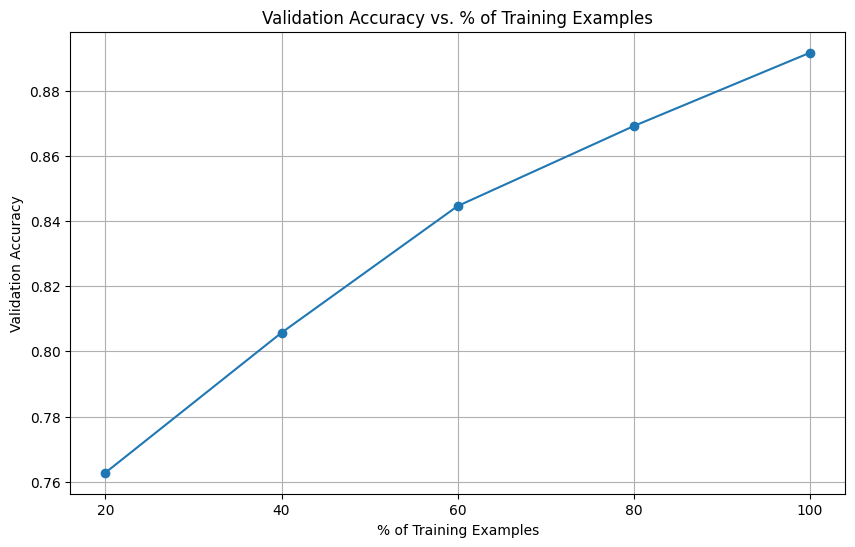

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Percentages of training data to use
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]

# List to store validation accuracies
validation_accuracies = []

# Iterate through the specified percentages
for percentage in train_percentages:
    # Determine the number of training examples to use
    num_examples = int(percentage * X_train.shape[0])

    # Select the first `num_examples` from the training set
    X_train_subset = X_train[:num_examples]
    y_train_subset = y_train[:num_examples]

    # Train the Logistic Regression model on the subset
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_subset, y_train_subset)

    # Validate on the full validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy
    validation_accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_percentages) * 100, validation_accuracies, marker='o')
plt.title('Validation Accuracy vs. % of Training Examples')
plt.xlabel('% of Training Examples')
plt.ylabel('Validation Accuracy')
plt.xticks(np.array(train_percentages) * 100)  # Set x-ticks to be percentage values
plt.grid(True)
plt.show()


**KNN**

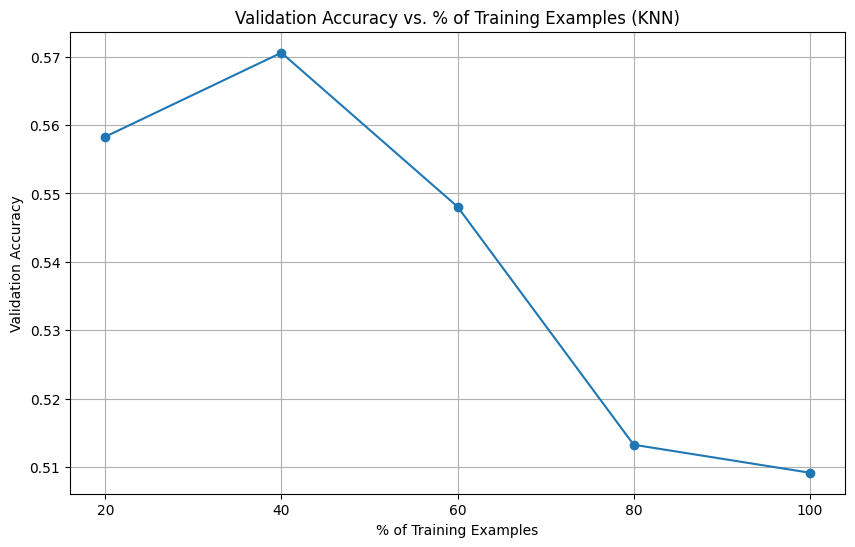

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Percentages of training data to use
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]

# List to store validation accuracies
validation_accuracies = []

# Iterate through the specified percentages
for percentage in train_percentages:
    # Determine the number of training examples to use
    num_examples = int(percentage * X_train.shape[0])

    # Select the first `num_examples` from the training set
    X_train_subset = X_train[:num_examples]
    y_train_subset = y_train[:num_examples]

    # Train the KNN model on the subset
    model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
    model.fit(X_train_subset, y_train_subset)

    # Validate on the full validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy
    validation_accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_percentages) * 100, validation_accuracies, marker='o')
plt.title('Validation Accuracy vs. % of Training Examples (KNN)')
plt.xlabel('% of Training Examples')
plt.ylabel('Validation Accuracy')
plt.xticks(np.array(train_percentages) * 100)  # Set x-ticks to be percentage values
plt.grid(True)
plt.show()


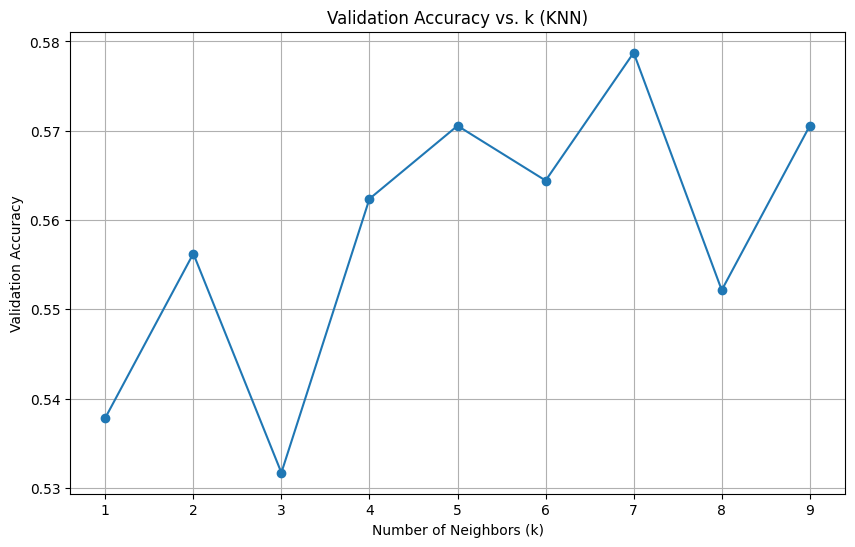

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Percentage of training data to use
train_percentage = 0.4

# Determine the number of training examples to use (40% of the training set)
num_examples = int(train_percentage * X_train.shape[0])

# Select the first `num_examples` from the training set
X_train_subset = X_train[:num_examples]
y_train_subset = y_train[:num_examples]

# List to store validation accuracies for different values of k
validation_accuracies = []

# Loop over different values of k (1 to 9)
for k in range(1, 10):
    # Train the KNN model with the current value of k
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_subset, y_train_subset)

    # Validate on the full validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy for this value of k
    validation_accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), validation_accuracies, marker='o')
plt.title('Validation Accuracy vs. k (KNN)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.xticks(range(1, 10))  # Set x-ticks to be values of k
plt.grid(True)
plt.show()


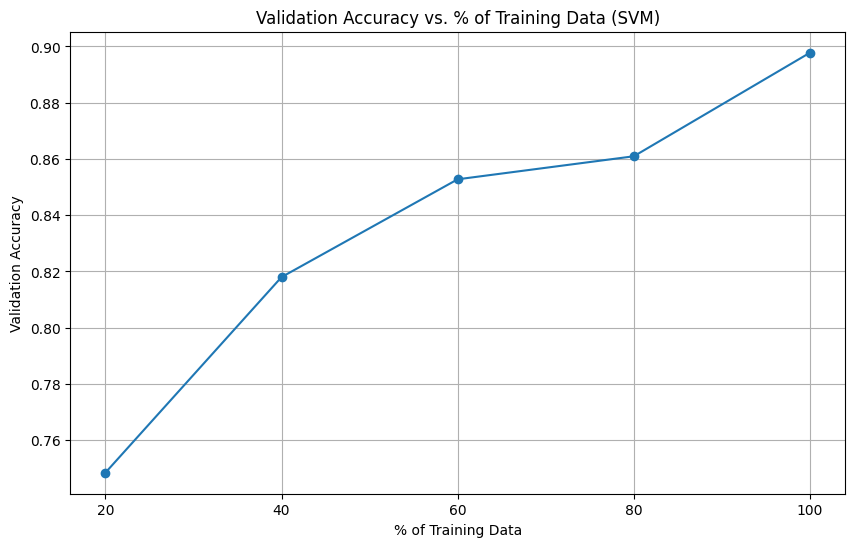

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Percentages of training data to use
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]

# List to store validation accuracies
validation_accuracies = []

# Loop over different percentages of training data
for percentage in train_percentages:
    # Determine the number of training examples to use
    num_examples = int(percentage * X_train.shape[0])

    # Select the first `num_examples` from the training set
    X_train_subset = X_train[:num_examples]
    y_train_subset = y_train[:num_examples]

    # Train the SVM model
    model = SVC(C=1.0, kernel='linear')  # You can adjust C and kernel as needed
    model.fit(X_train_subset, y_train_subset)

    # Validate on the full validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy
    validation_accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_percentages) * 100, validation_accuracies, marker='o')
plt.title('Validation Accuracy vs. % of Training Data (SVM)')
plt.xlabel('% of Training Data')
plt.ylabel('Validation Accuracy')
plt.xticks(np.array(train_percentages) * 100)  # Set x-ticks to be percentage values
plt.grid(True)
plt.show()


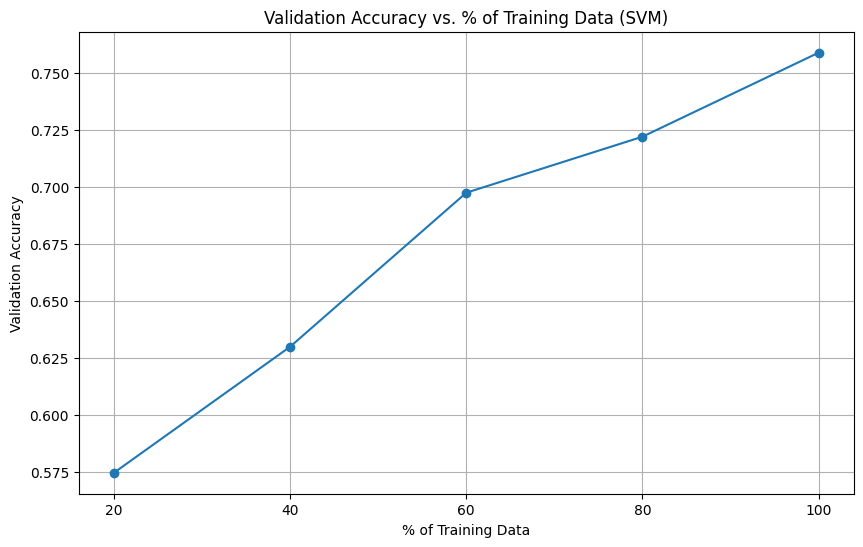

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Percentages of training data to use
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]

# List to store validation accuracies
validation_accuracies = []

# Loop over different percentages of training data
for percentage in train_percentages:
    # Determine the number of training examples to use
    num_examples = int(percentage * X_train.shape[0])

    # Select the first `num_examples` from the training set
    X_train_subset = X_train[:num_examples]
    y_train_subset = y_train[:num_examples]

    # Train the SVM model
    model = SVC(C=1.0, kernel='rbf')  # You can adjust C and kernel as needed
    model.fit(X_train_subset, y_train_subset)

    # Validate on the full validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    # Store the accuracy
    validation_accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(np.array(train_percentages) * 100, validation_accuracies, marker='o')
plt.title('Validation Accuracy vs. % of Training Data (SVM)')
plt.xlabel('% of Training Data')
plt.ylabel('Validation Accuracy')
plt.xticks(np.array(train_percentages) * 100)  # Set x-ticks to be percentage values
plt.grid(True)
plt.show()


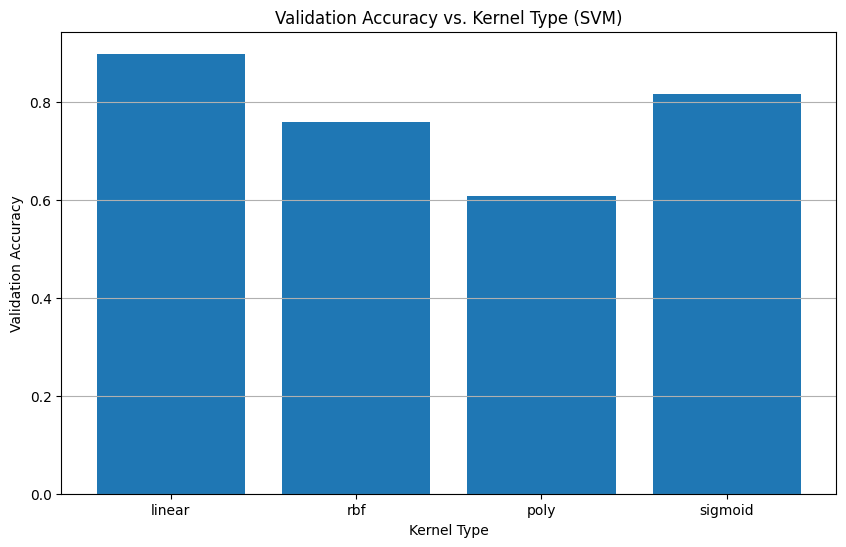

In [ ]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']  # Add 'precomputed' if needed
validation_accuracies = []

for kernel in kernels:
    model = SVC(kernel=kernel, C=1.0)  # Adjust C as needed
    model.fit(X_train_subset, y_train_subset)

    # Validate on the full validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)

    validation_accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(kernels, validation_accuracies)
plt.title('Validation Accuracy vs. Kernel Type (SVM)')
plt.xlabel('Kernel Type')
plt.ylabel('Validation Accuracy')
plt.grid(axis='y')
plt.show()


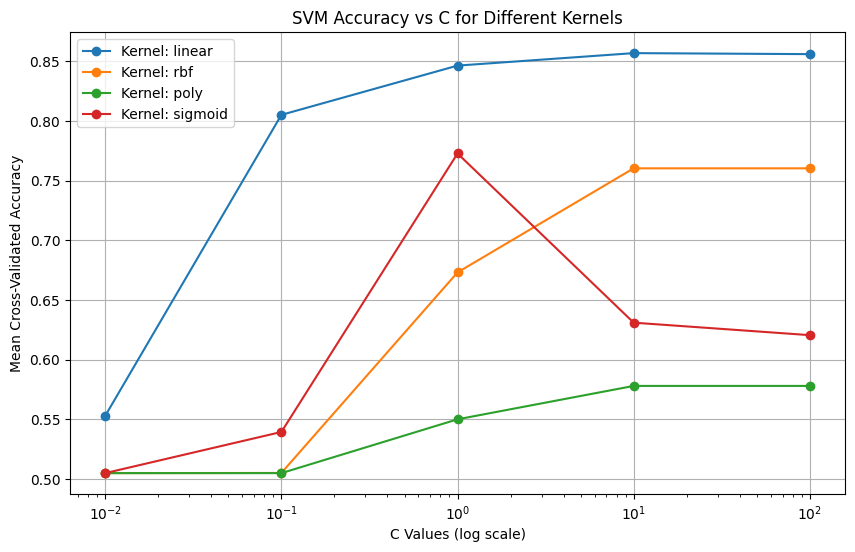

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_val, and y_val are already defined

# Define the C values and kernels
C_values = [0.01, 0.1, 1, 10, 100]
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Store results for plotting
results = {kernel: [] for kernel in kernels}

# Perform grid search for each kernel
for kernel in kernels:
    # Create the SVC model
    svm_model = SVC(kernel=kernel)

    # Create the parameter grid for the current kernel
    param_grid = {'C': C_values}

    # Create the GridSearchCV object
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Collect results for the current kernel
    results[kernel] = grid_search.cv_results_['mean_test_score']

# Plot the results
plt.figure(figsize=(10, 6))

for kernel in kernels:
    plt.plot(C_values, results[kernel], marker='o', label=f'Kernel: {kernel}')

# Set plot properties
plt.xscale('log')  # Use log scale for better visualization of C values
plt.xlabel('C Values (log scale)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('SVM Accuracy vs C for Different Kernels')
plt.xticks(C_values)  # Set x-ticks to be the actual C values
plt.legend()
plt.grid()
plt.show()


**Best model for dataset is SVM with linear kernel, we'll use 60% for data with gives about 86% of accuracy**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Percentages of training data to use
train_percentages = 0.6
# Determine the number of training examples to use
num_examples = int(train_percentages * X_train.shape[0])

# Select the first `num_examples` from the training set
X_train_subset = X_train[:num_examples]
y_train_subset = y_train[:num_examples]

# Train the SVM model
model = SVC(C=1.0, kernel='linear')  # You can adjust C and kernel as needed
model.fit(X_train_subset, y_train_subset)

pred_emoticons = model.predict(X_encoded_test)

np.savetxt('pred_emoticon.txt', pred_emoticons, fmt='%d')

